In [ ]:

# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.read_csv('/content/Raw_Males_VF_Dataset_Coursework1.csv')
df.shape

numpy: 1.22.4
matplotlib: 3.7.1
pandas: 1.4.4
sklearn: 1.2.2


(2864, 15)

In [ ]:
df.head(10)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,NaN,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,NaN,-0.59
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59
3,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50
4,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,NaN,0.27
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,NaN,0.24
7,B0018,M,54,24,192.0,81.79,87,81,123.0,38,10,0.0,NaN,NaN,0.23
8,B0019,M,49,23,189.0,74.41,80,95,136.0,44,3,0.0,NaN,NaN,0.22
9,B0020,M,57,26,188.0,84.00,91,82,109.0,61,0,0.0,NaN,NaN,0.18


In [ ]:
df.describe()

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2859.000000,2864.000000,2864.000000,2862.000000,129.000000,2864.000000
mean,62.324721,29.284567,182.935929,91.345150,99.055168,91.596718,133.770199,81.696578,4.531425,0.040531,23.527132,5.553844
std,8.509000,3.885323,8.671651,13.678241,10.137395,10.631628,16.834580,64.805761,4.421835,0.197236,13.259476,2.626842
min,41.000000,20.000000,1.700000,55.410000,70.000000,48.000000,90.000000,1.000000,0.000000,0.000000,2.000000,-0.760000
25%,57.000000,27.000000,178.000000,81.917500,92.000000,84.000000,122.000000,46.000000,2.000000,0.000000,12.000000,3.680000
50%,63.000000,29.000000,183.000000,89.725000,98.000000,91.000000,132.000000,67.000000,3.000000,0.000000,22.000000,5.350000
75%,69.000000,31.000000,188.000000,98.740000,105.000000,99.000000,144.000000,92.000000,6.000000,0.000000,34.000000,7.152500
max,190.000000,54.000000,210.000000,168.770000,154.000000,133.000000,192.000000,656.000000,69.000000,1.000000,50.000000,16.060000


In [ ]:
df['Visceral_Fat_Volume_Litres']=pd.cut(df['Visceral_Fat_Volume_Litres'],bins=[0,3,99],labels=['0','1'])


In [ ]:
df.isna().sum()

SUBJECT_ID                            0
SEX                                   0
AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg          5
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        2
DISCONTINUED_NO_                   2862
CIGARETTES_CONSUMED_PER_DAY        2735
Visceral_Fat_Volume_Litres            2
dtype: int64

In [ ]:
df.dropna(subset=['Visceral_Fat_Volume_Litres'], axis=0, inplace=True)

In [ ]:
del df['SUBJECT_ID']
del df['SEX']

In [ ]:
df.dropna(thresh=0.8*len(df),axis=1,inplace=True)

In [ ]:
import numpy as np
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

In [ ]:
df

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0,0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2859,69,41,184.0,130.23,125,94,123.0,44,16,0.0,1
2860,63,32,189.0,110.83,107,94,108.0,46,6,0.0,1
2861,61,35,180.0,110.32,114,89,130.0,41,5,0.0,1
2862,75,48,189.0,159.52,127,116,159.0,25,3,0.0,1


In [ ]:
X=df.drop(columns=['Visceral_Fat_Volume_Litres'])

X.head()



,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0


In [ ]:
y = df['Visceral_Fat_Volume_Litres'].values
y[0:]

['0', '0', '0', '0', '0', ..., '1', '1', '1', '1', '1']
Length: 2862
Categories (2, object): ['0' < '1']

In [ ]:
df.isna().sum()

AGE_years                          0
BMI                                0
HEIGHT_cm                          0
WEIGHT_kg                          0
WAIST_CIRCUMFERENCE_cm             0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0
WALK_DURATION_PER_DAY_MINUTES      0
COMPUTER_USE_TIME_PER_DAY_HOURS    0
SMOKING_STATUS                     0
Visceral_Fat_Volume_Litres         0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

AGE_years                          0.0
BMI                                0.0
HEIGHT_cm                          0.0
WEIGHT_kg                          0.0
WAIST_CIRCUMFERENCE_cm             0.0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.0
WALK_DURATION_PER_DAY_MINUTES      0.0
COMPUTER_USE_TIME_PER_DAY_HOURS    0.0
SMOKING_STATUS                     0.0
Visceral_Fat_Volume_Litres         0.0
dtype: float64

In [ ]:
df.dtypes

AGE_years                             int64
BMI                                   int64
HEIGHT_cm                           float64
WEIGHT_kg                           float64
WAIST_CIRCUMFERENCE_cm                int64
DIASTOLIC_BLOOD_PRESSURE_mmHg         int64
SYSTOLIC_BLOOD_PRESSURE_mmHg        float64
WALK_DURATION_PER_DAY_MINUTES         int64
COMPUTER_USE_TIME_PER_DAY_HOURS       int64
SMOKING_STATUS                      float64
Visceral_Fat_Volume_Litres         category
dtype: object

In [ ]:
df.dropna(thresh=0.8*len(df),axis=1,inplace=True)

In [ ]:
df

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0,0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2859,69,41,184.0,130.23,125,94,123.0,44,16,0.0,1
2860,63,32,189.0,110.83,107,94,108.0,46,6,0.0,1
2861,61,35,180.0,110.32,114,89,130.0,41,5,0.0,1
2862,75,48,189.0,159.52,127,116,159.0,25,3,0.0,1


In [ ]:
df['SMOKING_STATUS '] = df['SMOKING_STATUS '].fillna(df.mean())

In [ ]:
df['SYSTOLIC_BLOOD_PRESSURE_mmHg'] = df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].fillna(df.mean())

In [ ]:
df.isna().sum()/len(df)*100

AGE_years                          0.0
BMI                                0.0
HEIGHT_cm                          0.0
WEIGHT_kg                          0.0
WAIST_CIRCUMFERENCE_cm             0.0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.0
WALK_DURATION_PER_DAY_MINUTES      0.0
COMPUTER_USE_TIME_PER_DAY_HOURS    0.0
SMOKING_STATUS                     0.0
Visceral_Fat_Volume_Litres         0.0
dtype: float64

In [ ]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
df.head(10)


,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0,0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
7,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0
8,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0
9,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0
10,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0
11,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0


In [ ]:
df[numeric_columns] = df[numeric_columns].interpolate(method ='linear', limit_direction ='forward')

In [ ]:
df.head(10)

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
3,56,26,1.8,76.45,85,91,139.0,151,2,0.0,0
4,48,25,1.7,65.36,84,76,98.0,257,6,0.0,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
7,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0
8,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0
9,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0
10,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0
11,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0


<Axes: >

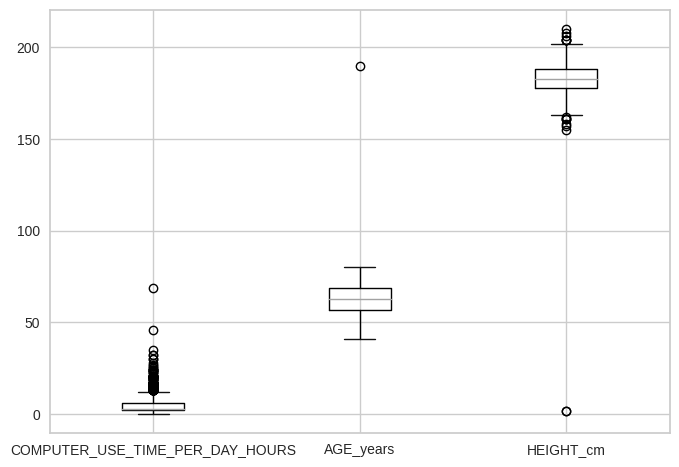

In [ ]:
import sklearn 

from sklearn.datasets import load_files

import pandas as pd 

import matplotlib.pyplot as plt 

   
   

# Create the dataframe 

a = ['COMPUTER_USE_TIME_PER_DAY_HOURS', 'AGE_years', 'HEIGHT_cm']

 

# Box Plot 

import seaborn as sns 
df.boxplot(a)

 



In [ ]:
Q1 = np.percentile(df[a], 25,  interpolation = 'midpoint')   

Q3 = np.percentile(df[a], 75, interpolation = 'midpoint')  

IQR = Q3 - Q1  
print("Old Shape: ", df.shape)  

# Upper bound 

upper = np.where(df[a] >= (Q3+1.5*IQR)) 

# Lower bound 

lower = np.where(df[a] <= (Q1-1.5*IQR)) 

   



Old Shape:  (2862, 11)


In [ ]:
''' Removing the Outliers ''' 

df.drop(upper[0], inplace = True) 

df.drop(lower[0], inplace = True) 

   

print("New Shape: ", df.shape) 

New Shape:  (2862, 11)


In [ ]:
df.dtypes

AGE_years                             int64
BMI                                   int64
HEIGHT_cm                           float64
WEIGHT_kg                           float64
WAIST_CIRCUMFERENCE_cm                int64
DIASTOLIC_BLOOD_PRESSURE_mmHg         int64
SYSTOLIC_BLOOD_PRESSURE_mmHg        float64
WALK_DURATION_PER_DAY_MINUTES         int64
COMPUTER_USE_TIME_PER_DAY_HOURS       int64
SMOKING_STATUS                      float64
Visceral_Fat_Volume_Litres         category
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
print(scaled_df)

[[ -0.03924078  -0.33025895  -0.91490883 ...  -0.36595124   0.33216005
   -0.20567843]
 [ -0.74483513  -0.85031459 -20.88535476 ...   1.06896836  -0.5723519
   -0.20567843]
 [ -1.68562761  -1.11034241 -20.89688504 ...   2.70446813   0.33216005
   -0.20567843]
 ...
 [ -0.15683984   1.48993578  -0.3383948  ...  -0.62824837   0.10603206
   -0.20567843]
 [  1.489547     4.87029742   0.69933045 ...  -0.87511626  -0.34622392
   -0.20567843]
 [  1.37194794   2.00999142  -0.3383948  ...   0.46722789   0.78441603
   -0.20567843]]


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)





In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 


In [ ]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7764842840512224


In [ ]:
df_d=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_d



,Actual,Predicted
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
854,1,1
855,1,1
856,1,1
857,1,1


In [ ]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8498253783469151


In [ ]:
from sklearn.model_selection import GridSearchCV 

#create new a DT model 
DT = DecisionTreeClassifier() 

#create a dictionary of all values we want to test for max depth 
param_grid = {'max_depth': np.arange(1, 25)} 

#use gridsearch to test all values for max depth 
DT_gscv = GridSearchCV(DT, param_grid, cv=5) 

#fit model to data 
DT_gscv.fit(X, y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
DT_gscv.best_params_ 

{'max_depth': 2}

In [ ]:
DT_gscv.best_score_ 

0.8508256141763996

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

# Create KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 3) 

# Fit the classifier to the data 
knn= knn.fit(X_train,y_train) 

In [ ]:
#show first 5 model predictions on the test data 
knn.predict(X_test)[0:5] 

array(['1', '1', '1', '1', '1'], dtype=object)

In [ ]:
#check accuracy of our model on the test data 
knn.score(X_test, y_test) 

0.8416763678696159

In [ ]:
y_pred1 = knn.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8416763678696159


Text(0, 0.5, 'Mean Error')

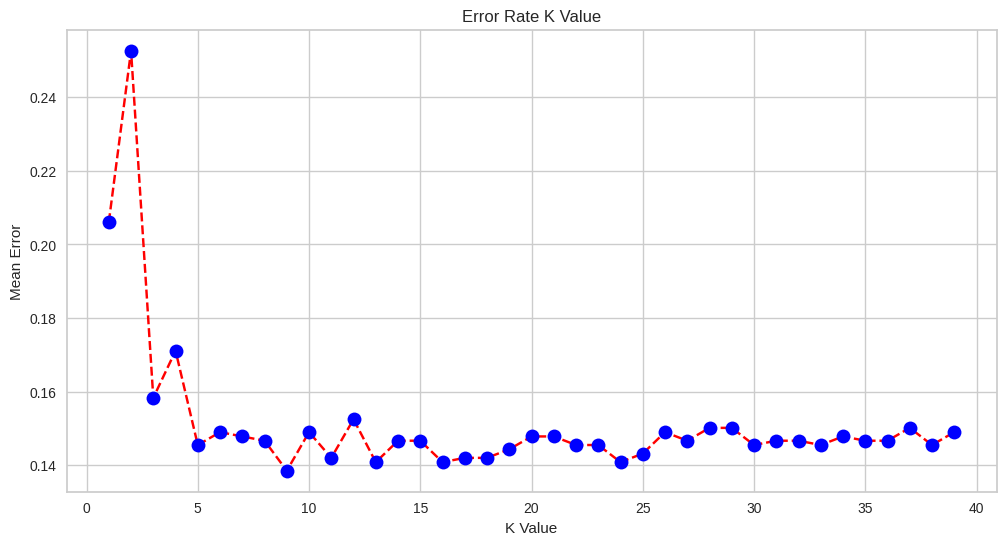

In [ ]:
# Calculating error for K values between 1 and 40 

error = [] 

import numpy as np 

import matplotlib.pyplot as plt 

# Calculating error for K values between 1 and 40 

for i in range(1, 40): 

    knn = KNeighborsClassifier(n_neighbors=i) 

    knn.fit(X_train, y_train) 

    pred_i = knn.predict(X_test) 

    error.append(np.mean(pred_i != y_test)) 

plt.figure(figsize=(12, 6)) 

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', 

         markerfacecolor='blue', markersize=10) 

plt.title('Error Rate K Value') 

plt.xlabel('K Value') 

plt.ylabel('Mean Error') 

In [ ]:
from sklearn.model_selection import cross_val_score 
import numpy as np 

#create a new KNN model 
knn_cv = KNeighborsClassifier(n_neighbors=2) 

#train model with cv of 5  
cv_scores = cross_val_score(knn_cv, X, y, cv=5) 

#print each cv score (accuracy) and average them 
print(cv_scores) 
print('cv_scores mean:{}'.format(np.mean(cv_scores))) 

[0.59162304 0.69458988 0.77097902 0.80594406 0.82867133]
cv_scores mean:0.7383614640159142


In [ ]:


#create new a knn model 
knn2 = KNeighborsClassifier() 

#create a dictionary of all values we want to test for n_neighbors 
param_grid = {'n_neighbors': np.arange(1, 25)} 

#use gridsearch to test all values for n_neighbors 
knn_gscv = GridSearchCV(knn2, param_grid, cv=5) 

#fit model to data 
knn_gscv.fit(X, y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value 
knn_gscv.best_params_ 

{'n_neighbors': 18}

In [ ]:
#check mean score for the top performing value of n_neighbors 
knn_gscv.best_score_ 

0.84557597725137

In [ ]:
from sklearn.metrics import accuracy_score 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_i))) 

Accuracy: 0.85


In [ ]:
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB() 

nb=nb.fit(X_train, y_train) 

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test)) 

Naive Bayes score:  0.7962747380675204


In [ ]:
from sklearn.metrics import accuracy_score 
y_pred2 = nb.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred2))


Accuracy: 0.7962747380675204


In [ ]:


#create a dictionary of all values we want to test for n_neighbors 
param_grid = {'var_smoothing': np.arange(1, 25)} 

#use gridsearch to test all values for n_neighbors 
nb_gscv = GridSearchCV(nb, param_grid, cv=5) 

#fit model to data 
nb_gscv.fit(X, y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             n_jobs=None,
             param_grid={'var_smoothing': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
nb_gscv.best_params_ 

{'var_smoothing': 2}

In [ ]:
nb_gscv.best_score_ 

0.8406698885756476

In [ ]:
from sklearn.neural_network import MLPClassifier 
# Import necessary modules 

from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error 

from math import sqrt 

from sklearn.metrics import r2_score 

In [ ]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
AGE_years,2862.0,62.333683,8.504955,41.00,57.0000,63.000,69.00,190.00
BMI,2862.0,29.270091,3.846414,20.00,27.0000,29.000,31.00,51.00
HEIGHT_cm,2862.0,182.934836,8.674331,1.70,178.0000,183.000,188.00,210.00
WEIGHT_kg,2862.0,91.297313,13.561231,55.41,81.9125,89.715,98.73,168.77
WAIST_CIRCUMFERENCE_cm,2862.0,99.022013,10.061044,70.00,92.0000,98.000,105.00,153.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2862.0,91.575472,10.600911,48.00,84.0000,91.000,98.00,130.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2862.0,133.736087,16.775894,90.00,122.0000,132.000,144.00,192.00
WALK_DURATION_PER_DAY_MINUTES,2862.0,81.718029,64.823319,1.00,46.0000,67.000,92.00,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2862.0,4.531097,4.423047,0.00,2.0000,3.000,6.00,69.00
SMOKING_STATUS,2862.0,0.040559,0.197233,0.00,0.0000,0.000,0.00,1.00


In [ ]:
#Scale the Train and Test Data 

from sklearn.preprocessing import StandardScaler 

 

scaler = StandardScaler() 

 

# Fit only to the training data 

scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True) 

 

# Now apply the transformations to the data: 

X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test) 

In [ ]:
%%time 

 

from sklearn.model_selection import GridSearchCV 

 

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'], 

          'hidden_layer_sizes': [(13,), (50,100,), (50,75,100,)], 

          'solver': ['adam', 'sgd', 'lbfgs'], 

          'learning_rate' : ['constant', 'adaptive', 'invscaling'], 

          'max_iter': [500] 

         } 

 

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5) 

mlp_classif_grid.fit(X_train,y_train) 

 

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train)) 

print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test)) 

print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_) 

print('Best Parameters : ',mlp_classif_grid.best_params_) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 0.860
Test Accuracy : 0.856
Best Accuracy Through Grid Search : 0.858
Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': (50, 75, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
CPU times: user 12 s, sys: 3.61 s, total: 15.6 s
Wall time: 14min 53s


In [ ]:
mlp = MLPClassifier(activation= 'relu', hidden_layer_sizes= (13,), learning_rate='constant', solver='lbfgs', max_iter=500) 

mlp = mlp.fit(X_train,y_train) 

In [ ]:
y_pred3 = mlp.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8370197904540163


In [ ]:
predictions = mlp.predict(X_test) 


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
#Confusion Matrix for ANN
print(confusion_matrix(y_test,predictions))


[[ 42  83]
 [ 57 677]]


In [ ]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.42      0.34      0.38       125
           1       0.89      0.92      0.91       734

    accuracy                           0.84       859
   macro avg       0.66      0.63      0.64       859
weighted avg       0.82      0.84      0.83       859



In [ ]:
#Confusion Matrix for DT
print(confusion_matrix(y_test,y_pred))


[[  9 116]
 [ 13 721]]


In [ ]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.41      0.07      0.12       125
           1       0.86      0.98      0.92       734

    accuracy                           0.85       859
   macro avg       0.64      0.53      0.52       859
weighted avg       0.80      0.85      0.80       859



In [ ]:
#Confusion Matrix for KNN
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))


[[ 10 115]
 [ 12 722]]


In [ ]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.45      0.08      0.14       125
           1       0.86      0.98      0.92       734

    accuracy                           0.85       859
   macro avg       0.66      0.53      0.53       859
weighted avg       0.80      0.85      0.81       859



In [ ]:
#Confusion matrix for NB
predict = nb.predict(X_test)
print(confusion_matrix(y_test,predict))

[[ 60  65]
 [105 629]]


In [ ]:
print(classification_report(y_test,predict)) 

              precision    recall  f1-score   support

           0       0.36      0.48      0.41       125
           1       0.91      0.86      0.88       734

    accuracy                           0.80       859
   macro avg       0.63      0.67      0.65       859
weighted avg       0.83      0.80      0.81       859



In [ ]:
DT_best = DT_gscv.best_estimator_

In [ ]:
knn_best = knn_gscv.best_estimator_
nb_best = nb_gscv.best_estimator_
mlp_best = mlp_classif_grid.best_estimator_

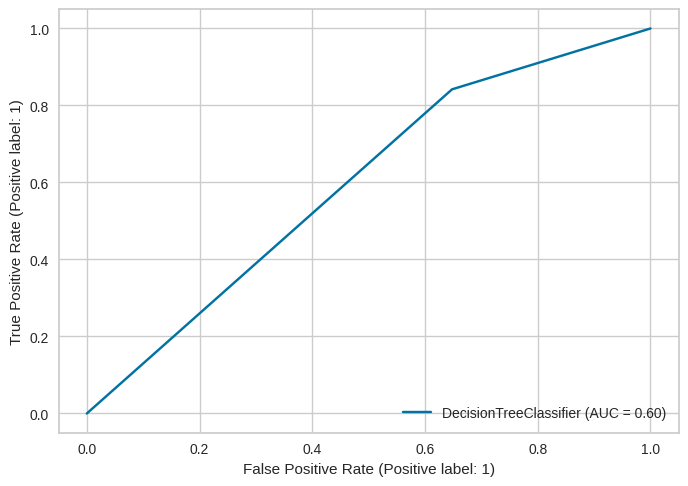

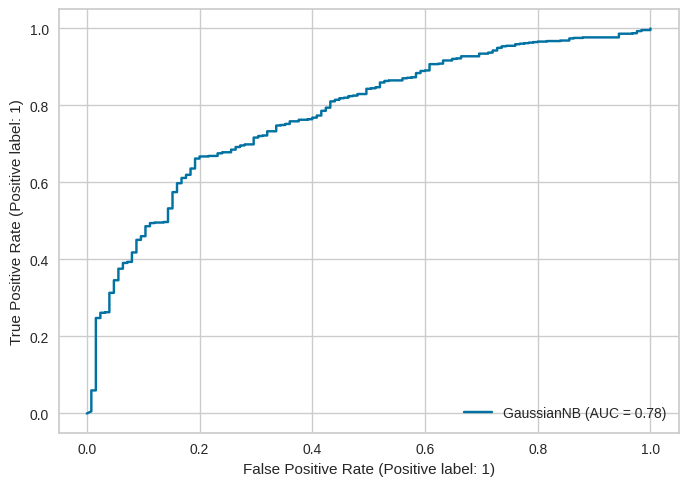

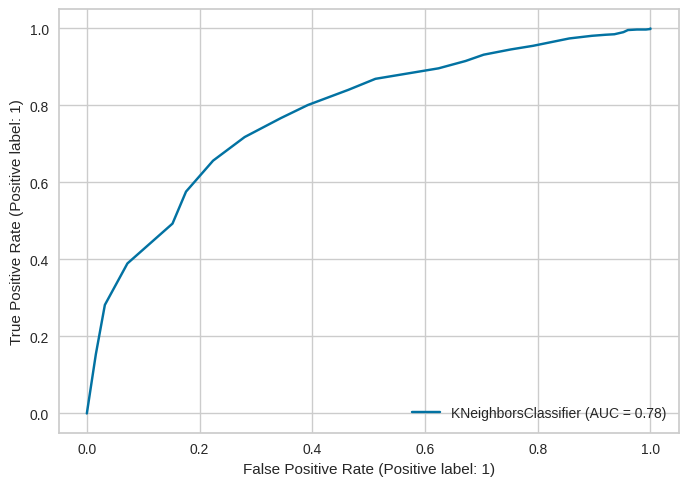

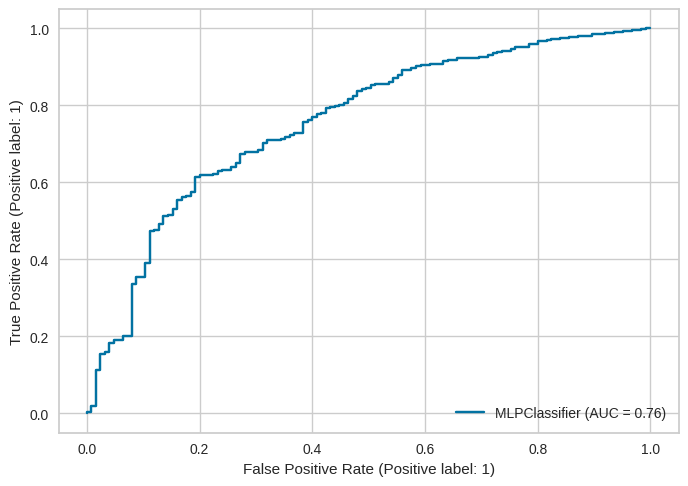

In [ ]:
from sklearn.metrics import RocCurveDisplay 
DT.fit(X_train, y_train)
DT_disp = RocCurveDisplay.from_estimator(DT, X_test, y_test) 

nb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test) 

knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test) 

mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test, y_test) 

In [ ]:
print('knn: {}'.format(knn_best.score(X_test, y_test))) 
print('DT: {}'.format(DT_best.score(X_test, y_test))) 
print('nb: {}'.format(nb_best.score(X_test, y_test)))
print('mlp: {}'.format(mlp_best.score(X_test, y_test)))

knn: 0.8637951105937136
DT: 0.8579743888242142
nb: 0.8544819557625145
mlp: 0.8556461001164144


In [ ]:
from sklearn.ensemble import VotingClassifier 

#create a dictionary of our models 
estimators=[('knn', knn_best), ('DT', DT_best), ('nb', nb_best), ('mlp', mlp_best)] 

#create our voting classifier, inputting our models 
ensemble = VotingClassifier(estimators, voting='hard') 

In [ ]:
#fit model to training data 
ensemble.fit(X_train, y_train) 

#test our model on the test data 
ensemble.score(X_test, y_test) 

0.860302677532014

In [ ]:
# install pycaret
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *
s = setup(df, target = 'Visceral_Fat_Volume_Litres')
# compare all models
best_model = compare_models(sort='F1')


,Description,Value
0,Session id,5314
1,Target,Visceral_Fat_Volume_Litres
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(2862, 11)"
5,Transformed data shape,"(2862, 11)"
6,Transformed train set shape,"(2003, 11)"
7,Transformed test set shape,"(859, 11)"
8,Numeric features,10
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8572,0.8178,0.9631,0.8784,0.9188,0.3380,0.3683,1.5810
lr,Logistic Regression,0.8547,0.8242,0.9744,0.8685,0.9183,0.2769,0.3274,0.8580
et,Extra Trees Classifier,0.8537,0.8107,0.9637,0.8748,0.9170,0.3104,0.3436,0.6210
lda,Linear Discriminant Analysis,0.8457,0.8233,0.9875,0.8521,0.9148,0.1431,0.2158,0.2830
gbc,Gradient Boosting Classifier,0.8507,0.8195,0.9554,0.8775,0.9147,0.3222,0.3462,0.6820
ada,Ada Boost Classifier,0.8502,0.8004,0.9494,0.8814,0.9139,0.3379,0.3585,1.0230
ridge,Ridge Classifier,0.8412,0.0000,0.9982,0.8419,0.9134,0.0362,0.0837,0.2450
dummy,Dummy Classifier,0.8387,0.5000,1.0000,0.8387,0.9123,0.0000,0.0000,0.1620
lightgbm,Light Gradient Boosting Machine,0.8457,0.8019,0.9464,0.8790,0.9114,0.3190,0.3351,0.5610
xgboost,Extreme Gradient Boosting,0.8452,0.7888,0.9417,0.8820,0.9107,0.3317,0.3454,0.3890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# tune the best model
tuned_model_knn = tune_model(knn)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8209,0.7170,0.9821,0.8333,0.9016,-0.0281,-0.0546
1,0.8507,0.7384,1.0000,0.8485,0.9180,0.1432,0.2777
2,0.8607,0.7512,0.9940,0.8608,0.9227,0.2573,0.3553
3,0.8100,0.8367,0.9524,0.8421,0.8939,0.0206,0.0250
4,0.8650,0.8619,0.9821,0.8730,0.9244,0.3161,0.3733
5,0.8550,0.8169,0.9881,0.8601,0.9197,0.2111,0.2879
6,0.8500,0.7833,1.0000,0.8485,0.9180,0.1007,0.2303
7,0.8700,0.9084,0.9702,0.8859,0.9261,0.3937,0.4243
8,0.8400,0.7658,0.9940,0.8434,0.9126,0.0408,0.0932


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_model_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8507,0.8369,0.9226,0.9012,0.9118,0.4283,0.4296
1,0.8308,0.8088,0.9524,0.8602,0.9040,0.2107,0.2319
2,0.8259,0.8028,0.9286,0.8715,0.8991,0.2674,0.2748
3,0.8500,0.7958,0.9464,0.8833,0.9138,0.3421,0.3546
4,0.8600,0.7839,0.9583,0.8846,0.9200,0.3671,0.3870
5,0.8500,0.7868,0.9286,0.8966,0.9123,0.3961,0.3991
6,0.8350,0.8039,0.9226,0.8857,0.9038,0.3265,0.3299
7,0.8450,0.8188,0.9226,0.8960,0.9091,0.3844,0.3863
8,0.8750,0.8337,0.9583,0.8994,0.9280,0.4598,0.4734


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_model_DT = tune_model(DT)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8657,0.8505,0.9405,0.9029,0.9213,0.4650,0.4695
1,0.8507,0.8080,0.9524,0.8791,0.9143,0.3444,0.3618
2,0.8557,0.8271,0.9167,0.9112,0.9139,0.4678,0.4679
3,0.8700,0.7828,0.9583,0.8944,0.9253,0.4298,0.4455
4,0.8300,0.7712,0.9226,0.8807,0.9012,0.2964,0.3005
5,0.8550,0.8398,0.9583,0.8798,0.9174,0.3343,0.3560
6,0.8550,0.7893,0.9286,0.9017,0.9150,0.4241,0.4263
7,0.8600,0.8410,0.9405,0.8977,0.9186,0.4205,0.4264
8,0.8600,0.8444,0.9524,0.8889,0.9195,0.3860,0.4001


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


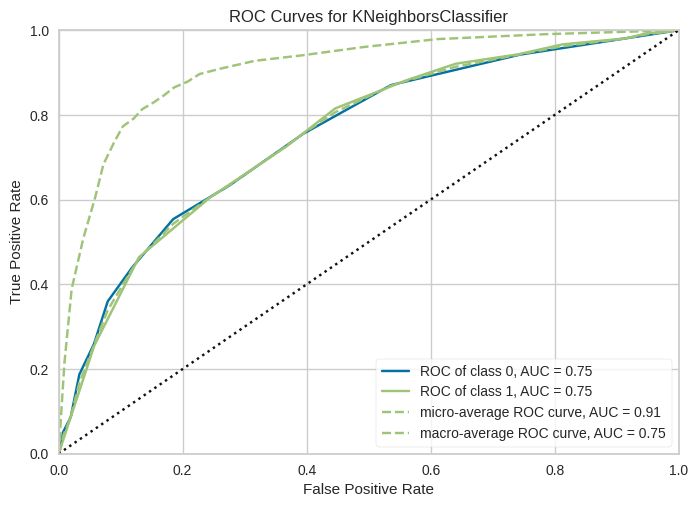

In [ ]:
# Analyse the AUC Plot
plot_model(tuned_model_knn, plot = 'auc')


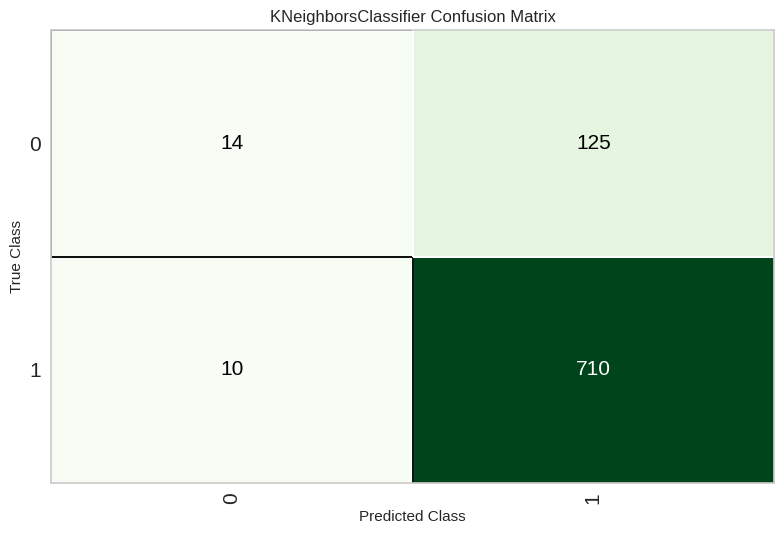

In [ ]:
# Analyse the Confusion Matrix
plot_model(tuned_model_knn, plot = 'confusion_matrix')

